# Youtube comments spam classification

This dataset is comprise of comments collection from users for videos on youtube of artist i.e Psy, Katy Perry, LMFAO, Eminem, and Shakira.

In these datasets, there is a class column where (0) indicates that it is not a spam and (1) if it is a Spam.

We will use this to build models which classify the comment is either a spam or not.


In [162]:
#!pip install emoji

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from collections import Counter
import nltk
import html
import re
import string
import emoji

In [164]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [165]:
df1 = pd.read_csv('Youtube01-Psy.csv')
df2 = pd.read_csv('Youtube02-KatyPerry.csv')
df3 = pd.read_csv('Youtube03-LMFAO.csv')
df4 = pd.read_csv('Youtube04-Eminem.csv')
df5 = pd.read_csv('Youtube05-Shakira.csv')

frames = [df1,df2,df3,df4,df5]
df = pd.concat(frames)

In [166]:
print(df.shape)
print(df.columns)
df.head

(1956, 5)
Index(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'CLASS'], dtype='object')


<bound method NDFrame.head of                                       COMMENT_ID  ... CLASS
0    LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU  ...     1
1    LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A  ...     1
2    LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8  ...     1
3            z13jhp0bxqncu512g22wvzkasxmvvzjaz04  ...     1
4            z13fwbwp1oujthgqj04chlngpvzmtt3r3dw  ...     1
..                                           ...  ...   ...
365  _2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA  ...     0
366  _2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI  ...     0
367  _2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs  ...     0
368  _2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0  ...     0
369  _2viQ_Qnc685RPw1aSa1tfrIuHXRvAQ2rPT9R06KTqA  ...     0

[1956 rows x 5 columns]>

Text(0.5, 1.0, 'Frequency of Ham(0) & Spam(1)')

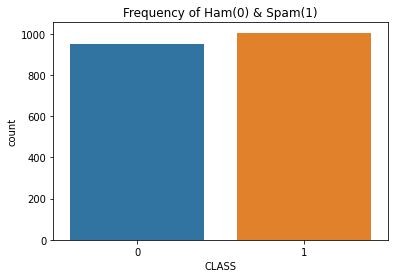

In [167]:
sb.countplot(x='CLASS',data=df).set_title("Frequency of Ham(0) & Spam(1)")

In [168]:
df['comment_len'] = df['CONTENT'].apply(len)
df.head(5)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,comment_len
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,56
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,166
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1,38
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39


In [169]:
df.groupby('CLASS').describe()

comment_len                                                         
            count        mean         std   min   25%   50%    75%     max
CLASS                                                                     
0           951.0   49.644585   56.284782   2.0  18.0  34.0   62.0   753.0
1          1005.0  137.336318  158.977404  10.0  36.0  65.0  171.0  1200.0

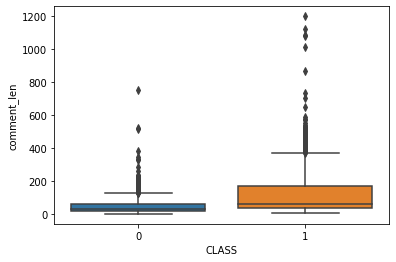

In [170]:
sb.boxplot(x='CLASS', y='comment_len', data=df)

In [171]:
#Trying to insert all available words in a list individually and count the most occuring word in each list.

spam_comments = df[df["CLASS"] == 1]["CONTENT"]
ham_comments = df[df["CLASS"] == 0]["CONTENT"]

spam_words = []
ham_words = []

def spamword (spamWords) :
    global spam_words
    words = [word.lower() for word in spam_comments if word.lower().isalpha()]
    spam_words = spam_words + words
    
def hamword (spamWords) :
    global ham_words
    words = [word.lower() for word in ham_comments if word.lower().isalpha()]
    ham_words = ham_words + words

spamlist = spamword(spam_comments)
hamlist = hamword(spam_comments)

count_ham  = Counter(hamlist)
count_spam = Counter(spamlist)

#Using Counter mos_common method to count most common instance in a dataFrame
df_ham  = pd.DataFrame(count_ham.most_common(20),  columns=['word', 'count'])
df_spam = pd.DataFrame(count_spam.most_common(20), columns=['word', 'count'])



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


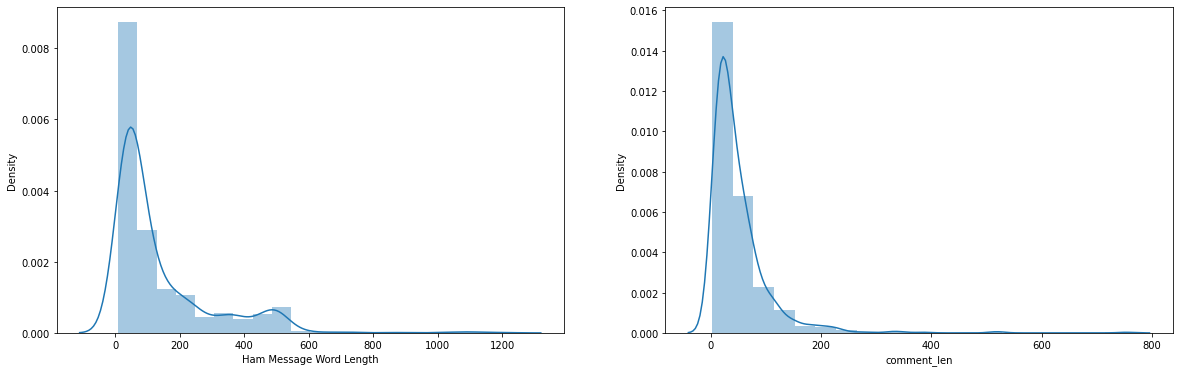

In [172]:
f, ax = plt.subplots(1, 2, figsize = (20, 6))

sb.distplot(df[df["CLASS"] == 1]["comment_len"], bins = 20, ax = ax[0])
ax[0].set_xlabel("Spam Message Word Length")

sb.distplot(df[df["CLASS"] == 0]["comment_len"], bins = 20, ax = ax[1])
ax[0].set_xlabel("Ham Message Word Length")

plt.show()

In [173]:
df = df.drop(['COMMENT_ID', 'AUTHOR', 'DATE', 'comment_len'], axis=1)

In [174]:
print(df.describe)

<bound method NDFrame.describe of                                                CONTENT  CLASS
0    Huh, anyway check out this you[tube] channel: ...      1
1    Hey guys check out my new channel and our firs...      1
2               just for test I have to say murdev.com      1
3     me shaking my sexy ass on my channel enjoy ^_^ ﻿      1
4              watch?v=vtaRGgvGtWQ   Check this out .﻿      1
..                                                 ...    ...
365  I love this song because we sing it at Camp al...      0
366  I love this song for two reasons: 1.it is abou...      0
367                                                wow      0
368                            Shakira u are so wiredo      0
369                         Shakira is the best dancer      0

[1956 rows x 2 columns]>


Lowercase all the words in the df column "CONTENT"

In [175]:
df["CONTENT"] = df["CONTENT"].str.lower()

Replace all the html tags <a... > with the keyword "htmllink"

In [176]:
df['CONTENT']=df['CONTENT'].str.replace("(<a.+>)","htmllink")

Remove all other html tags.

In [177]:
df['CONTENT']=df['CONTENT'].str.replace("(<.+>)","")

Replace all the strings starting with "http" or "https" with the keyword "htmllink"

In [178]:
df['CONTENT']=df['CONTENT'].str.replace(r'(https?://\S+|http?://\S+ )',"htmllink")

Replace all the strings containing ".com"  or "watch\"  with the keyword "htmllink"

In [179]:
df["CONTENT"]=df["CONTENT"].str.replace(r"\S*.com\S*|\S*watch\?\S*","htmllink")

In [180]:
def clean_nonalpha(input_text):
  pattern = re.compile('([^\s\w]|)+')
  return pattern.sub("",input_text)

In [181]:
def translate_emojis(input_text):
  return emoji.demojize(input_text, delimiters=(" ", " "))

In [182]:
df["CONTENT"]=df["CONTENT"].apply(translate_emojis)

In [183]:
df["CONTENT"]=df["CONTENT"].apply(clean_nonalpha)

According to the paper, they achieved better results by not filtering stopwords and lemmatizing. This first approach is not going to perform further filtering.

Bag of words approach.

In [184]:
vocab = []
for sentence in df["CONTENT"]:
  for word in sentence.split():
    vocab.append(word)

In [185]:
# Eliminate duplicate words in the vocabulary
vocabulary = set(vocab)
print(len(vocabulary))

3973


In [186]:
for word in vocabulary:
  df[word] = 0

In [187]:
df.head()

,CONTENT,CLASS,agree,rosary,9039s,blond,god,codes,prod,saved,heartbreaking,play,catch,pretty,smiling_face_with_smiling_eyes,retrieve,ampi,2x109,prioritize,33,highly,duh,dante,driveshaft,강남스타일,joinits,musicvideo,lauren,lanta,mee,rugby,inspired,fact,honestly,any,3d,care,fear,tshirtof,piss,...,appreciate,fuego,admire,2126492636,shop,mobile,apprecitate,shakira,show,evil,no,hwang,lhudygirlamaya,eggmode,insanely,george,one0,grave,ad,fame,saying,awesom,lik,shy,12,review,intervene,types,weren39t,page,whistleblower,patrik,spirit,honest,ready,flimsy,tan,confused_face,girlfriend,bf4
0,huh anyway check out this youtube channel koby...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,hey guys check out my new channel and our firs...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,just for test i have to say htmllink,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,me shaking my sexy ass on my channel enjoy _,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,htmllink check this out,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [188]:
for index, sentence in enumerate(df["CONTENT"]):
  for word in sentence.split():
    df[word].iloc[index] += 1  


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [189]:
df.head()

,CONTENT,CLASS,agree,rosary,9039s,blond,god,codes,prod,saved,heartbreaking,play,catch,pretty,smiling_face_with_smiling_eyes,retrieve,ampi,2x109,prioritize,33,highly,duh,dante,driveshaft,강남스타일,joinits,musicvideo,lauren,lanta,mee,rugby,inspired,fact,honestly,any,3d,care,fear,tshirtof,piss,...,appreciate,fuego,admire,2126492636,shop,mobile,apprecitate,shakira,show,evil,no,hwang,lhudygirlamaya,eggmode,insanely,george,one0,grave,ad,fame,saying,awesom,lik,shy,12,review,intervene,types,weren39t,page,whistleblower,patrik,spirit,honest,ready,flimsy,tan,confused_face,girlfriend,bf4
0,huh anyway check out this youtube channel koby...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,hey guys check out my new channel and our firs...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,just for test i have to say htmllink,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,me shaking my sexy ass on my channel enjoy _,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,htmllink check this out,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [190]:
df.tail()

,CONTENT,CLASS,agree,rosary,9039s,blond,god,codes,prod,saved,heartbreaking,play,catch,pretty,smiling_face_with_smiling_eyes,retrieve,ampi,2x109,prioritize,33,highly,duh,dante,driveshaft,강남스타일,joinits,musicvideo,lauren,lanta,mee,rugby,inspired,fact,honestly,any,3d,care,fear,tshirtof,piss,...,appreciate,fuego,admire,2126492636,shop,mobile,apprecitate,shakira,show,evil,no,hwang,lhudygirlamaya,eggmode,insanely,george,one0,grave,ad,fame,saying,awesom,lik,shy,12,review,intervene,types,weren39t,page,whistleblower,patrik,spirit,honest,ready,flimsy,tan,confused_face,girlfriend,bf4
365,i love this song because we sing it at camp al...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
366,i love this song for two reasons 1it is about ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
367,wow,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
368,shakira u are so wiredo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
369,shakira is the best dancer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now we can create two dictionaries, for spam and not spam comments, containing the words and the total count

In [191]:
df_spam =df[df["CLASS"] == 1]
df_spam.loc['Total']= df_spam.sum(numeric_only=True, axis=0)
df_spam.tail()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,CONTENT,CLASS,agree,rosary,9039s,blond,god,codes,prod,saved,heartbreaking,play,catch,pretty,smiling_face_with_smiling_eyes,retrieve,ampi,2x109,prioritize,33,highly,duh,dante,driveshaft,강남스타일,joinits,musicvideo,lauren,lanta,mee,rugby,inspired,fact,honestly,any,3d,care,fear,tshirtof,piss,...,appreciate,fuego,admire,2126492636,shop,mobile,apprecitate,shakira,show,evil,no,hwang,lhudygirlamaya,eggmode,insanely,george,one0,grave,ad,fame,saying,awesom,lik,shy,12,review,intervene,types,weren39t,page,whistleblower,patrik,spirit,honest,ready,flimsy,tan,confused_face,girlfriend,bf4
358,hey music fans i really appreciate all of you ...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
359,check out my new mixtape check out my new mixt...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
360,check out my new mixtape check out my new mixt...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
361,check out my new mixtape check out my new mixt...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total,NaN,1005.0,4.0,1.0,1.0,0.0,10.0,2.0,1.0,1.0,1.0,11.0,1.0,3.0,2.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,1.0,1.0,1.0,32.0,1.0,3.0,3.0,1.0,3.0,...,28.0,2.0,1.0,0.0,1.0,1.0,1.0,6.0,2.0,3.0,35.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,5.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,18.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0


In [192]:
print(df_spam.shape)

(1006, 3975)


In [193]:
df_not_spam =df[df["CLASS"] == 0]
df_not_spam.loc['Total']= df_not_spam.sum(numeric_only=True, axis=0)
df_not_spam.tail()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,CONTENT,CLASS,agree,rosary,9039s,blond,god,codes,prod,saved,heartbreaking,play,catch,pretty,smiling_face_with_smiling_eyes,retrieve,ampi,2x109,prioritize,33,highly,duh,dante,driveshaft,강남스타일,joinits,musicvideo,lauren,lanta,mee,rugby,inspired,fact,honestly,any,3d,care,fear,tshirtof,piss,...,appreciate,fuego,admire,2126492636,shop,mobile,apprecitate,shakira,show,evil,no,hwang,lhudygirlamaya,eggmode,insanely,george,one0,grave,ad,fame,saying,awesom,lik,shy,12,review,intervene,types,weren39t,page,whistleblower,patrik,spirit,honest,ready,flimsy,tan,confused_face,girlfriend,bf4
366,i love this song for two reasons 1it is about ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
367,wow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
368,shakira u are so wiredo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
369,shakira is the best dancer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total,NaN,0.0,1.0,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,47.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,38.0,3.0,0.0,14.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0


In [194]:
print(df_not_spam.shape)

(952, 3975)


Drop the first two columns of each dictionary.

In [195]:
df_spam.drop("CONTENT",1,inplace=True)
df_spam.drop("CLASS",1,inplace=True)
df_not_spam.drop("CONTENT",1,inplace=True)
df_not_spam.drop("CLASS",1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [196]:
df_spam.head()

,agree,rosary,9039s,blond,god,codes,prod,saved,heartbreaking,play,catch,pretty,smiling_face_with_smiling_eyes,retrieve,ampi,2x109,prioritize,33,highly,duh,dante,driveshaft,강남스타일,joinits,musicvideo,lauren,lanta,mee,rugby,inspired,fact,honestly,any,3d,care,fear,tshirtof,piss,gain,modgone,...,appreciate,fuego,admire,2126492636,shop,mobile,apprecitate,shakira,show,evil,no,hwang,lhudygirlamaya,eggmode,insanely,george,one0,grave,ad,fame,saying,awesom,lik,shy,12,review,intervene,types,weren39t,page,whistleblower,patrik,spirit,honest,ready,flimsy,tan,confused_face,girlfriend,bf4
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
df_not_spam.head()

,agree,rosary,9039s,blond,god,codes,prod,saved,heartbreaking,play,catch,pretty,smiling_face_with_smiling_eyes,retrieve,ampi,2x109,prioritize,33,highly,duh,dante,driveshaft,강남스타일,joinits,musicvideo,lauren,lanta,mee,rugby,inspired,fact,honestly,any,3d,care,fear,tshirtof,piss,gain,modgone,...,appreciate,fuego,admire,2126492636,shop,mobile,apprecitate,shakira,show,evil,no,hwang,lhudygirlamaya,eggmode,insanely,george,one0,grave,ad,fame,saying,awesom,lik,shy,12,review,intervene,types,weren39t,page,whistleblower,patrik,spirit,honest,ready,flimsy,tan,confused_face,girlfriend,bf4
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [198]:
dict_spam = {word: count for word, count in zip(df_spam.columns,df_spam.loc['Total'])}
dict_not_spam = {word: count for word, count in zip(df_not_spam.columns,df_not_spam.loc['Total'])}

In [199]:
sorted_spam = sorted(dict_spam.items(),key=lambda x: x[1], reverse=True)
sorted_not_spam = sorted(dict_not_spam.items(),key=lambda x: x[1], reverse=True)
print(sorted_spam)
print(sorted_not_spam)

[('out', 569.0), ('check', 545.0), ('htmllink', 514.0), ('my', 512.0), ('and', 485.0), ('to', 480.0), ('you', 463.0), ('i', 457.0), ('the', 413.0), ('a', 389.0), ('this', 383.0), ('on', 334.0), ('please', 236.0), ('it', 222.0), ('subscribe', 221.0), ('video', 220.0), ('for', 209.0), ('of', 208.0), ('me', 202.0), ('youtube', 194.0), ('channel', 188.0), ('if', 170.0), ('like', 150.0), ('can', 128.0), ('just', 123.0), ('new', 119.0), ('in', 118.0), ('guys', 113.0), ('music', 111.0), ('is', 109.0), ('so', 107.0), ('up', 104.0), ('have', 97.0), ('your', 94.0), ('will', 93.0), ('be', 89.0), ('red_heart', 87.0), ('but', 85.0), ('at', 83.0), ('money', 82.0), ('hey', 82.0), ('am', 79.0), ('im', 78.0), ('make', 78.0), ('from', 73.0), ('get', 72.0), ('do', 68.0), ('all', 68.0), ('as', 67.0), ('videos', 67.0), ('song', 62.0), ('thank', 61.0), ('thanks', 59.0), ('with', 58.0), ('our', 58.0), ('would', 57.0), ('that', 57.0), ('i39m', 56.0), ('are', 56.0), ('us', 51.0), ('u', 51.0), ('see', 51.0), ('